,review,sentiment
0,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent...",negative
1,I am actually horrified this place is still in business. My 3 year old son needed a haircut this...,negative
2,I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and hou...,positive
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop;\n\nMumbly, unengaged waiter;\n\nClueless mana...",negative
4,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive ...",positive
5,"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I ...",positive
6,"Really good place with simple decor, amazing food and great hospitality.\nVery impressed with th...",positive
7,"Awesome office and staff, very professional and friendly. I saw Adam Garling PA-C and his assist...",positive
8,Most delicious authentic Italian I've had in the US. You wouldn't leave this place unhappy. The ...,positive
9,I have been here twice. Very nice and laid back. I tried the weekend Southern menu and it was de...,positive


(20000, 2)

,review,sentiment
0,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent...",negative
1,I am actually horrified this place is still in business. My 3 year old son needed a haircut this...,negative
2,I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and hou...,positive
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop;\n\nMumbly, unengaged waiter;\n\nClueless mana...",negative
4,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive ...",positive
5,"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I ...",positive
6,"Really good place with simple decor, amazing food and great hospitality.\nVery impressed with th...",positive
7,"Awesome office and staff, very professional and friendly. I saw Adam Garling PA-C and his assist...",positive
8,Most delicious authentic Italian I've had in the US. You wouldn't leave this place unhappy. The ...,positive
9,I have been here twice. Very nice and laid back. I tried the weekend Southern menu and it was de...,positive


(20000, 2)

              precision    recall  f1-score   support

    negative       0.91      0.94      0.92      2490
    positive       0.94      0.91      0.92      2510

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



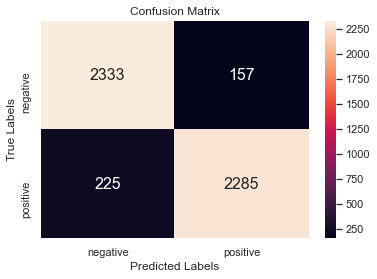

In [10]:
# Run data cleaning process
%run clean_data.ipynb

# Run model training
%run nlp_model.ipynb

In [11]:
# Pre incremental train test (model will predict negative)
input = ["I don't like this place, but it's good"]
print(input)
print(clf.predict(cv.transform(input)))

["I don't like this place, but it's good"]
['negative']


In [12]:
# Incremental training
X_instance = cv.transform(input)
y_instance = ['positive']
max_iter = 100

for i in range(0, max_iter):
    clf.partial_fit(X_instance, y_instance)
    if clf.predict(X_instance) == y_instance:
        break

In [13]:
# Post incremental train test (weights changed so model will predict positive now)
print(input)
print(clf.predict(cv.transform(input)))

["I don't like this place, but it's good"]
['positive']


In [14]:
# Save newly trained model
joblib.dump(cv, '../static/models/input_transformer.pkl')
joblib.dump(clf, '../static/models/review_sentiment.pkl')


['../static/models/review_sentiment.pkl']